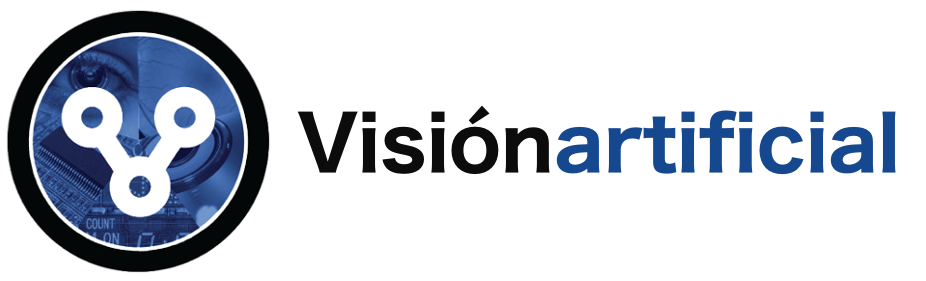

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# 3.1 Xeometría epipolar

A xeometría epipolar é o **conxunto de restricións xeométricas entre dúas vistas dunha escena**. Cando dúas cámaras capturan unha escena 3D desde dúas posicións diferentes, hai unha serie de relacións xeométricas entre os puntos 3D e as súas proxeccións sobre as imaxes 2D que levan a restricións entre os puntos da imaxe. Estas relacións derívanse a partir da suposición de que as cámaras poden ser aproximadas polo modelo de cámara pinhole (por exemplo, as súas imaxes non están distorsionadas). $\\[10pt]$

<img src="./images/epipolar.png" width="500" />$\\[10pt]$

Neste caderno, afondaremos na xeometría epipolar, aprendendo:

- Conceptos básicos de xeometría epipolar (<a href="#321">sección 3.2.1</a>)
- Rectificación estéreo (<a href="#322">sección 3.2.2</a>)
- Matriz esencial (<a href="#323">sección 3.2.3</a>) e
- Matriz fundamental (<a href="#324">sección 3.2.4</a>)

## Contexto do problema - Rectificación estéreo

Na práctica, como representamos no caderno anterior, a triangulación precisa non é totalmente factible xa que **os sistemas estéreo non cumpren a configuración ideal**, pero a boa noticia é que dúas imaxes tomadas con calquera configuración (sempre que exista superposición entre as imaxes, por suposto) pódense transformar para que cumpran cunha configuración de cámara estéreo ideal. Isto chámase **rectificación estéreo** ou **rectificación de imaxe**. Aquí, aplicamos homografías ás imaxes da esquerda e da dereita para forzar esta configuración ideal.$\\[10pt]$

<img src="./images/rectification.png" width="600" />

A rectificación de imaxes baséase na xeometría epipolar, así que, imos comezar a aprender como funciona!

## 3.2.1 Conceptos de xeometría epipolar <span id="321"></span>

Antes de comezar a explicar como funciona a xeometría epipolar, temos que comprender algúns conceptos básicos: o **plano epipolar**, as **liñas epipolares** e os **epípolos**.

En primeiro lugar, temos o **plano epipolar**. Este plano está formado por 3 puntos: os centros ópticos esquerdo e dereito ($C_l,\ C_r$) e un punto 3D no mundo ($\mathbf{X}$).

<img src="./images/epipolar1.png" width="600" />

O interesante do plano epipolar é que **intersecta as imaxes nas liñas epipolares conxugadas** do sistema de visión estereoscópico. As proxeccións 2D $(x_l, x_r)$ do punto 3D $\mathbf{X}$ tamén están contidas no plano epipolar e **están nas súas correspondentes liñas epipolares**. Como se pode ver na imaxe, estas liñas epipolares son a **intersección do plano epipolar e dos planos da imaxe**.

Como podedes entender, sería interesante calcular estas liñas epipolares porque nos axudarán a comprobar **se un par de puntos correspondentes é correcto ou non** (para atopar o punto coincidente na outra imaxe, non Non é preciso buscar toda a imaxe, só buscar pola liña epipolar!). Isto chámase **restricción epipolar** útil para transformar unha busca en 2D nun problema 1D. Curiosamente, isto é válido para todos os píxeles das imaxes, é dicir, todos os píxeles terán a súa correspondente liña epipolar (ou **epiliña**, para abreviar) na outra imaxe. E aínda máis interesante, a dirección dos epiliñas **non depende da escena** senón só da configuración da cámara. É dicir, se tes un par de cámaras estéreo ríxida, as epiliñas non cambiarán independentemente da escena que esteas vendo. Entón:

> Dada unha configuración de dúas cámaras (representada por $R,t$), para cada punto 3D hai un **plano epipolar único** e, en consecuencia, un **par único de liñas epipolares**.

Por outra banda, quizais observaches que todas as liñas epipolares **se cruzan nun único punto en cada imaxe**, este punto chámase **epipolo** e representa a proxección do centro óptico de cada cámara sobre o outro plano da imaxe (ten en conta que pode estar fóra dos límites da imaxe!). Todas as epilinas pasan polo seu epípolo. Así, unha forma de determinar a posición do epipolo é calcular un conxunto de epilinas e atopar o seu punto de intersección.

<img src="./images/epipoles.png" width="450" />

Hai algúns casos especiais nos que un ou ambos epípolos **se sitúan no infinito** (se o plano da imaxe é paralelo á recta $C_l-C_r$), o que implica que non coñecemos a súa localización senón a súa *dirección* :


<table>
    <tr>
        <td><img src="./images/epipolar3.png" /></td>
        <td><img src="./images/epipoles_inf.png"  /></td>
    </tr>
</table>

Isto significa que, nesta situación, as epiliñas son **horizontais e paralelas**, o que é bastante útil como representamos no caderno anterior. Observa que, nese caso, a terceira coordenada da representación homoxénea da **posición epipolar é cero**. Nestes casos, podemos calcular a dirección na que se pode atopar o epipolo:

<img src="./images/epipolar4.png" width="800" />

### Onde están os epípolos?

Primeiro de todo, imos **buscar as coordenadas dun centro óptico** $\mathbf{C}$ no marco de referencia `MUNDO`, isto é $\mathbf{C}^W$. (*Lembra que o superíndice nun punto/vector indica o sistema de coordenadas de referencia*). Obviamente, no sistema de referencia local da mesma cámara, as súas coordenadas son iguais a cero (o centro óptico é a orixe das coordenadas!): $\mathbf{C}^C = \mathbf{0}$): $\\ [10 puntos] $


<img src="./images/epipolar5.png" width="500"/>

$$\begin{cases} \mathbf{C}^C = \mathbf{R}_W^C \mathbf{C}^W + \mathbf{t}_W^C \\[10pt] \mathbf{C}^C = \begin{bmatrix}0\\0\\0 \end{bmatrix} = \bf{0}\end{cases} \longrightarrow \mathbf{0} = \mathbf{R}_W^C \mathbf{C}^W + \mathbf{t}_W^C \rightarrow \mathbf{C}^W = -(\mathbf{R}_W^C)^\texttt{T}\mathbf{t}_W^C\\[20pt]$$

Para a cámara esquerda, e dado que se supón que o sistema `MUNDO` está situado no centro óptico da cámara esquerda, temos que: $\mathbf{R}_W^{C_l} = I, \; \mathbf{t}_W^{C_l} = \mathbf{0}$, isto é: $\mathbf{C}_l^W = \mathbf{0}$. $\\[5pt]$

De xeito análogo, o centro óptico dereito ten estas coordenadas: $C_r^W = -(\mathbf{R}_W^{C_r})^\texttt{T}\mathbf{t}_W^{C_r} = -\mathbf{R}^\texttt{T}\mathbf{t}\hspace{2cm}$ $\\[10pt]$


É dicir, o centro óptico esquerdo sitúase na orixe das coordenadas mentres que o dereito ten unha rotación arbitraria e unha traslación con respecto a el, que, por simplicidade, chamaremos $\mathbf{R}$ e $\mathbf{t}$.

Agora, imos atopar os epipolos esquerdo e dereito $(e_l,e_r)$ determinando a proxección dos centros ópticos no outro plano da imaxe. Lembra a ecuación xeral para a proxección de imaxes nos cadernos anteriores. *Nota: nestas ecuacións, o apóstrofo en $\tilde{e}'$ significa que as coordenadas están expresadas en píxeles, mentres que a tilde $\sim$ significa que está en coordenadas homoxéneas.*:$\\[5pt]$

$$e_l:  \lambda\tilde{e}'_l = \mathbf{P}_l \tilde{C}_r^W = \mathbf{K}_l [\mathbf{I}|\mathbf{0}]
\begin{bmatrix}-\mathbf{R}^\texttt{T} \mathbf{t}\\1 \end{bmatrix} = -\mathbf{K}_l \mathbf{R}^\texttt{T} \mathbf{t}\\
  e_r:  \lambda\tilde{e}'_r = \mathbf{P}_r \tilde{C}_l^W = \mathbf{K}_r [\mathbf{R}|\mathbf{t}]
\begin{bmatrix}\mathbf{0}\\1 \end{bmatrix} = \mathbf{K}_r \mathbf{t} \hspace{1.4cm}
\\[5pt]$$

onde $\mathbf{K}_l$ and $\mathbf{K}_r$ son as matrices de calibración da cámara esquerda e dereita, respectivamente.

Finalmente, os epípolos na **configuración ideal** para a triangulación (cámaras con eixe óptico paralelo, separadas por unha liña de base e cos mesmos parámetros intrínsecos):$\\[5pt]$


$$\mathbf{R} = \mathbf{I},\quad \mathbf{t} = [-b\ 0 \ 0]^\texttt{T}, \quad \mathbf{K} = \mathbf{K}_l = \mathbf{K}_r\\[3pt]
\lambda\tilde{e}'_l = -\mathbf{K}\mathbf{t} = [bk_xf \quad 0 \quad 0]^\texttt{T}\\
\lambda\tilde{e}'_r = \mathbf{K}\mathbf{t} = [-bk_xf \quad 0 \quad 0]^\texttt{T}$$


Como dixemos antes, **son puntos no infinito na dirección do eixe $X$!**

## 3.2.2 Rectificación estéreo <span id="322"></span>

Na práctica, a configuración da nosa cámara non será a ideal (é dicir, $\mathbf{R} \ne \mathbf{I} \wedge \mathbf{t} \ne [-b\ 0 \ 0]^\texttt{T} \wedge \mathbf{K}_l \ne \mathbf{K}_r$), e isto implica unha dificultade para **buscar as correspondencias e realizar a triangulación estéreo**:

<img src="./images/non-rectified.png" width="400" />

Como podes ver nas imaxes, **as liñas epipolares non son horizontais** como na configuración ideal, pero isto pódese solucionar. O proceso de **rectificación estéreo** proxecta as imaxes nun plano común para que as liñas epipolares se fagan horizontais en ambas imaxes e á mesma altura, é dicir, transfórmaas coma se foran captadas nunha configuración ideal, tomando os **epípolos no infinito**.

Para iso, podemos calcular unha **homografía para cada cámara** que transforma as imaxes a unha configuración ideal:

<img src="./images/rectified.png" width="400" />

#### <font color="orange">Solucións de OpenCV</font>

OpenCV define un método para a rectificación de imaxes chamado ([cv2.stereoRectify](https://docs.opencv.org/4.3.0/d9/d0c/group__calib3d.html#ga617b1685d4059c6040827800e72ad2b6)), que calcula a rotación para cada cámara. (virtualmente) fai que os dous planos de imaxe da cámara sexan o mesmo. Este método solicita as matrices $\mathbf{R}_r^l$ e $\mathbf{t}_r^l$, así como as matrices de calibración e despois aplica o modelo de cámara para calcular tales matrices de rotación. Como non temos un sistema estéreo que teña unha pose relativa fixa, non podemos obter esas matrices (poderíanse obter mediante [stereo calibration](https://docs.opencv.org/4.3.0/d9/d0c/group__calib3d.html#ga91018d80e2a93ade37539f01e6f07de5)).

Afortunadamente, existe o método [cv2.stereoRectifyUncalibrated](https://docs.opencv.org/4.3.0/d9/d0c/group__calib3d.html#gaadc5b14471ddc004939471339294f052), que devolve as **homografías de rectificación** para ambas imaxes a partir dun conxunto de puntos coincidentes (matches) e a **matriz fundamental** (explicada máis adiante). Este método úsase cando **non se coñece a pose relativa das cámaras** que capturaron as imaxes (por exemplo, dúas imaxes tomadas coa mesma cámara pero en posicións diferentes).

## 3.2.3 A matriz esencial <span id="323"></span>

Ao comezo do caderno, afirmamos que cada punto dunha imaxe terá unha liña epipolar correspondente na outra imaxe, que ven dada pola xeometría epipolar intrínseca entre as vistas. **A Matriz Esencial (E)** é unha matriz $3 \times 3$ que codifica esa xeometría epipolar **cando as cámaras están calibradas**. Entón, dado un punto nunha imaxe, multiplicalo pola matriz esencial daranos a liña epipolar na segunda vista:

$$l_l = \mathbf{E}\tilde{x_r}$$

<img src="./images/essential.png" width="600" />

onde $l_l$ é a epilina da imaxe da esquerda correspondente ao punto $x_r$ da dereita.

Pero, **como podemos calcular a matriz esencial?**

<img src="./images/essential2.png" width="800" />

Como se pode ver na imaxe, os vectores $\mathbf{X}_l$ (as coordenadas dun punto 3D no sistema de referencia esquerdo), $\mathbf{t}_r^l$ (as coordenadas do centro óptico dereito en o sistema de referencia esquerdo) e $\mathbf{RX}_r$ (as coordenadas dun punto 3D no sistema de referencia dereito) **son coplanares**, polo que, por definición, o seu produto triple é cero: $\\[5pt ]$

$$\mathbf{X}_l^\texttt{T} \cdot [\mathbf{t}_r^l \times (\mathbf{RX}_r)] = 0 $$


Isto pódese simplificar empregando os vectores de coordenadas dos puntos proxectados no plano da imaxe: $\text{X} = \lambda \tilde{x}$, que tamén son coplanares.

$$
  \mathbf{ \tilde{x} }_l^\texttt{T} [\mathbf{t}_r^l \times (\mathbf{R\tilde{x}}_r)] =
  \mathbf{ \tilde{x} }_l^\texttt{T} \underbrace{([\mathbf{t}_r^l]_\times \mathbf{R})}_{\mathbf{E}}\tilde{x}_r = 0 \Longrightarrow \\
  \boxed{\Large{\mathbf{\tilde{x}}_l^\texttt{T} \mathbf{E} \mathbf{\tilde{x}}_r = 0}} \\
$$

O problema desta matriz é que estamos a traballar en coordenadas de sensores (metros), polo que **as cámaras precisan estar calibradas** para transformar tales coordenadas en píxeles, é dicir, $\mathbf{K}$ debe ser coñecido, de xeito que (asumindo idénticos parámetros intrínsecos):

$$\mathbf{\tilde{x}}_r' = \mathbf{K}\mathbf{\tilde{x}}_r \\ \mathbf{\tilde{x}}_l' = \mathbf{K}\mathbf{\tilde{x}}_l$$

Dada esta limitación, o uso da **Fundamental Matrix** parece ser máis atractivo, xa que pode funcionar con **cámaras sen calibrar**. Imos descubrilo!

## 3.2.4 A Matriz Fundamental <span id="324"></span>

A **Matriz Fundamental (F)** é semellante á Matriz Esencial, pero funciona no **plano da imaxe en lugar de coas coordenadas do sensor**, pero teñen propiedades e expresións similares:

$$\boxed{\Large{\mathbf{\tilde{x}}'^\texttt{T}_l \mathbf{F} \mathbf{\tilde{x}}'_r = 0}}$$

Podemos obter a matriz fundamental a partir da esencial mediante:

$$
\begin{eqnarray}
    \mathbf{\tilde{x}}^\texttt{T}_l \mathbf{E} \mathbf{\tilde{x}}_r 
    & = & \left( \mathbf{K}^{-1} \mathbf{\tilde{x}}'_l \right)^\texttt{T}  [\mathbf{t}]_\times \mathbf{R} \left(\mathbf{K}^{-1} \mathbf{\tilde{x}}'_r\right) \\
    & = & \left( \mathbf{\tilde{x}}'^\texttt{T}_l \mathbf{K}^{\texttt{-T}} \right) [\mathbf{t}]_\times \mathbf{R} \left(\mathbf{K}^{-1} \mathbf{\tilde{x}}'_r\right) \\ 
    & = & \mathbf{\tilde{x}}'^\texttt{T}_l \left(\mathbf{K}^{\texttt{-T}} [\mathbf{t}]_\times \mathbf{R} \mathbf{K}^{-1} \right) \mathbf{\tilde{x}}'_r \\ 
    & = & \mathbf{\tilde{x}}'^\texttt{T}_l \mathbf{F} \mathbf{\tilde{x}}'_r = 0
\end{eqnarray}
$$

Entón, temos isto:

$$\boxed{\Large{\mathbf{F} = \mathbf{K}^\texttt{-T} [\mathbf{t}]_\times \mathbf{R} \mathbf{K}^{-1} = \mathbf{K}^\texttt{-T} \mathbf{E} \mathbf{K}^{-1}}}$$


O bo de traballar no plano da imaxe é que podemos obter a matriz $\mathbf{F}$ a partir de 8 pares de puntos en ambas imaxes, sen necesidade de ningún coñecemento sobre a matriz de calibración $\mathbf{K}$).

A **Matriz fundamental é a pedra angular da xeometría epipolar**, xa que relaciona os puntos e as súas correspondentes liñas epipolares deste xeito:

### F que relaciona dous puntos correspondentes:
Podemos comprobar se unha correspondencia de puntos é válida (os puntos están contidos nas liñas epipolares correspondentes):


$$\mathbf{\tilde{x}}'^\texttt{T}_l \mathbf{F} \mathbf{\tilde{x}}'_r = 0$$


### F relaciona puntos coas súas liñas epipolares:
Tamén é posible atopar a liña epipolar correspondente dun punto:


$$\mathbf{l}'_l = \mathbf{F} \mathbf{\tilde{x}}'_r \quad \mathbf{l}'_r = \mathbf{F}^\texttt{T} \mathbf{\tilde{x}}'_l$$


### F usada para calcular os epípolos:
Como o epipolo é o punto de intersección de todas as liñas epipolares, o epipolo é o espazo nulo da matriz fundamental:


$$
\begin{eqnarray}
    \mathbf{\tilde{x}}'^\texttt{T}_l \mathbf{F} \mathbf{\tilde{e}}'_r & = & 0,  \quad \forall \mathbf{\tilde{x}}'_l\\
    \mathbf{F} \mathbf{\tilde{e}}'_r & = & \mathbf{F}^\texttt{T} \mathbf{\tilde{e}}'_l = 0
\end{eqnarray}
$$

### BONUS: F é a estrela da xeometría epipolar !!! 
A matriz Fundamental é tan popular na reconstrucción 3D que incluso ten unha [canción propia](https://www.youtube.com/watch?v=DgGV3l82NTk). Escoitaa porque ten o seu interese!

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

images_path = './images/'

In [2]:
#Utilidade para debuxar puntos e linhas
def drawlines(im_points,pts,im_lines,lines,size=5):
    lines = lines.reshape(-1,3)
    _,c = im_lines.shape[:2]
    for r,ptr in zip(lines,pts):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        im_lines = cv2.line(im_lines, (x0,y0), (x1,y1), color,size)
        im_r = cv2.circle(im_points,tuple(ptr),size*size,color,-1)
    return im_lines,im_points

### **<span style="color:green"><b><i>TAREFA 1: Recuperando a matriz fundamental</i></b></span>**


Nesta tarefa, imos rectificar dúas imaxes mediante o método mencionado anteriormente [`cv2.stereoRectifyUncalibrated()`](https://docs.opencv.org/4.3.0/d9/d0c/group__calib3d.html#gaadc5b14471ddc004939471339294f052). Para iso, hai que tomar dúas imaxes da mesma escena desde diferentes posicións, imitando un sistema estéreo. *Nota: podes usar imaxes `iml3.png` (esquerda) e `imr3.png` (dereita) que che proporcionamos neste caderno se non podes usar as túas propias imaxes*.

O primeiro paso para a rectificación de imaxes é **buscar a matriz fundamental**, e para iso necesitamos un conxunto de puntos coincidentes. Use o teu detector de puntos clave favorito + descriptor para obter un conxunto de coincidencias (recomendo **ORB para imaxes grandes**).

**Que facer?** Calcula a matriz Fundamental que relaciona a xeometría epipolar entre as túas imaxes e visualizaa. Para iso tes que:

1. Carga as imaxes e convérteas a escala de grises.

In [3]:
# TAREFA 1
# Lemos a imaxe esquerda
im_l = cv2.imread(images_path + "iml3.png")
im_l = cv2.cvtColor(im_l, cv2.COLOR_BGR2RGB)

# Lemos a imaxe dereita
im_r = cv2.imread(images_path + "imr3.png")
im_r = cv2.cvtColor(im_r, cv2.COLOR_BGR2RGB)

# Pasamolas a gris
gray_l = cv2.cvtColor(im_l,cv2.COLOR_RGB2GRAY)
gray_r = cv2.cvtColor(im_r,cv2.COLOR_RGB2GRAY)

print("Tamanhos imaxes:",gray_l.shape,"e",gray_r.shape)

Tamanhos imaxes: (363, 439) e (363, 438)


2. Detectamos puntos clave en ambas as imaxes e buscamos as correspondencias (matching).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1 Opción 1, **usando ORB.**

In [4]:
# USA PUNTOS CLAVE ORB
# Detecta os puntos clave ORB usando o método OpenCV
# -- crea o detector ORB
orb = cv2.ORB_create()

# -- Detecta puntos clave ORB
kp_l = orb.detect(gray_l,None) # Deixa o segundo None como está
kp_r = orb.detect(gray_r,None) # Deixa o segundo None como está

# -- Obten os descritores con ORB
kp_l, des_l = orb.compute(gray_l, kp_l)
kp_r, des_r = orb.compute(gray_r, kp_r)

# Buscamos os puntos coincidentes a partir dos descriptores ORB.
matches = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True).match(des_l,des_r)

print("Numero de coincidencias ORB:",len(matches))

Numero de coincidencias ORB: 277


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2 Opción 2. Usa **SURF**.

In [ ]:
# # OUTRA OPCION:  detectar puntos clave usando o método SURF
# surf = cv2.xfeatures2d.SURF_create(2000)
   
# kp_l, des_l = surf.detectAndCompute(gray_l,None)
# kp_r, des_r = surf.detectAndCompute(gray_r,None)
   
# # Chama a knnMatch
# pre_matches = cv2.BFMatcher().knnMatch(des_l,des_r, k=2)

# #Filtra coincidencias non robustas
# matches = [m for m,n in pre_matches if m.distance < 0.60*n.distance]

# print("Numero de coincidencias SURF:",len(matches),"dun total de",len(pre_matches))

3. **Calcular a matriz Fundamental**. OpenCV xa implementa un método para calcular a matriz Fundamental ([`cv2.findFundamentalMat()`](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#gae420abc34eaa03d0c6a67359609d8429)) a partir de dúas listas de puntos coincidentes (desafortunadamente usando as súas coordenadas, non obxectos `cv2.keyPoint()`). Ademais da matriz Fundamental, este método tamén devolve unha "máscara" vectorial, que indica os puntos utilizados para o cálculo da matriz. Xoga co parámetro `ransacReprojThreshold` nesta función (bótalle unha ollada na documentación de OpenCV) e comproba cantas coincidencias se consideran inliers dependendo del. A saída esperada obtense con `ransacReprojThreshold=0.9`.

In [6]:
# Calcula matriz fundamental

# Crea listas de puntos clave correspondentes
pts_l = []
pts_r = []
for match in matches:
    pts_l.append(kp_l[match.queryIdx].pt)
    pts_r.append(kp_r[match.trainIdx].pt)
    
# Forzamos a conversion a números enteiros
pts_l = np.int32(pts_l)
pts_r = np.int32(pts_r)

# F, mask = cv2.findFundamentalMat(pts_l,pts_r,cv2.FM_LMEDS)
F, mask = cv2.findFundamentalMat(pts_l, pts_r, cv2.FM_RANSAC, 0.9, 0.99)

# manter só os inliers (coincidencias)
matches_in = [matches[i] for i in range(len(mask)) if mask[i]==1]
pts_l = [kp_l[m.queryIdx].pt for m in matches_in]
pts_r = [kp_r[m.trainIdx].pt for m in matches_in]

#  Forzamos a conversion a números enteiros
pts_l = np.int32(pts_l)
pts_r = np.int32(pts_r)

print("Numero de inliers =", len(matches_in), "dun total de", len(matches))
print("Matriz Fundamental =")
print(F)

Numero de inliers = 182 dun total de 277
Matriz Fundamental =
[[-5.91614279e-07 -2.58669483e-05  1.13875561e-02]
 [ 6.08591319e-05  5.22883936e-07 -5.21247504e-01]
 [-1.47380935e-02  5.12279919e-01  1.00000000e+00]]


**Comproba se os teus resultados son correctos**:

<font color='blue'>**Saída correcta:**  </font>

    Numero de inliers = 173 dun total de 277
    Matriz Fundamental =
    [[-3.49654807e-07 -7.20777510e-05  1.99345790e-02]
     [ 6.49820354e-05  2.66731011e-05  4.27861666e-01]
     [-1.99589277e-02 -4.36546231e-01  1.00000000e+00]]

4. E para rematar, mostra as coincidencias usadas!

**Deberías conseguir algo como:**

<center>
    <img src="./images/expected_output_assignment1.png" />
</center>

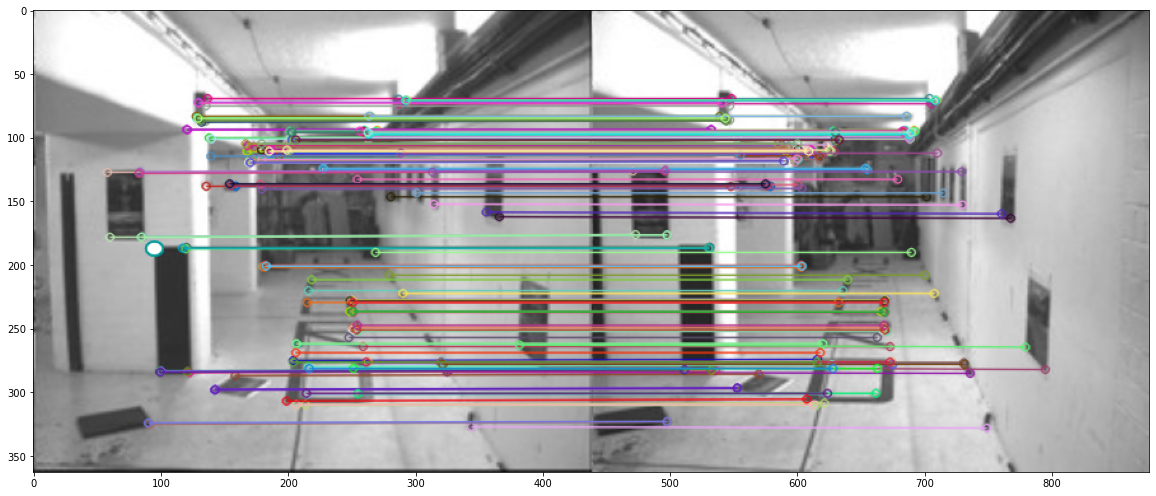

In [7]:
# Visualiza as coincidencias
matches_image = np.copy(im_l)
matches_image = cv2.drawMatches(im_l, kp_l, im_r, kp_r, matches_in, 
                                matches_image, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches_image);

### **<span style="color:green"><b><i>TAREFA 2: Rectificando imaxes!</i></b></span>**


Agora, podemos **calcular as homografías** necesarias para rectificar as imaxes co método [`cv2.stereoRectifyUncalibrated()`](https://docs.opencv.org/4.3.0/d9/d0c/group__calib3d.html#gaadc5b14471ddc004939471339294f052), que toma como entrada
- **as listas de puntos coincidentes** usadas no método anterior,
- **A matriz fundamental**,
- e **as dimensións das imaxes**.

e devolve as homografías calculadas. Unha vez que as tes, xa sabes como aplicar unha homografa a unha imaxe, non? Ben, entón faino!

**Que facer?** Calcula as homografías, utilízaas para rectificar as túas imaxes e móstraas.

**Deberías conseguir algo como:**
    
<center>
    <img src="./images/expected_output_assignment2.png" />
</center>

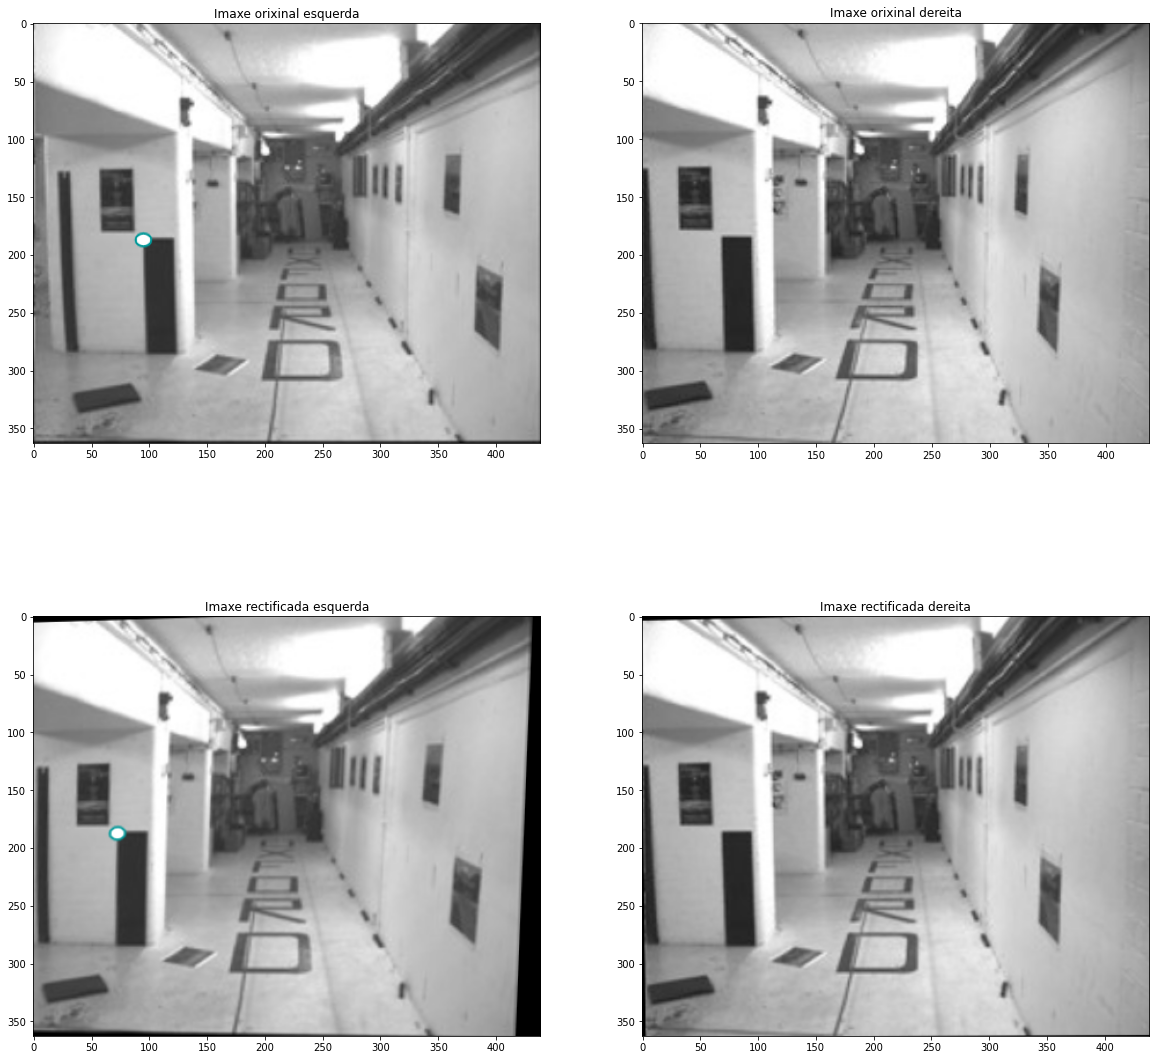

In [8]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

# TAREFA 2
#Obter homografias
ret, H_l, H_r = cv2.stereoRectifyUncalibrated(pts_l,pts_r, F, gray_r.shape)

# Aplicar homografias
rectified_l = cv2.warpPerspective(im_l, H_l, (im_l.shape[1],im_l.shape[0]))
rectified_r = cv2.warpPerspective(im_r, H_r, (im_l.shape[1],im_l.shape[0]))

# Visualizamos as imaxes rectificadas
plt.subplot(221)
plt.title("Imaxe orixinal esquerda")
plt.imshow(im_l)

plt.subplot(222)
plt.title("Imaxe orixinal dereita")
plt.imshow(im_r)

plt.subplot(223)
plt.title("Imaxe rectificada esquerda")
plt.imshow(rectified_l)

plt.subplot(224)
plt.title("Imaxe rectificada dereita")
plt.imshow(rectified_r);

### **<span style="color:green"><b><i>TAREFA 3: Comprobando a rectificación</i></b></span>**

Agora, visualiza as imaxes unha ao lado da outra (é dicir, concatenalas con [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)) e comproba que os puntos correspondentes caen na mesma fila! Para iso, só tes que escoller algúns puntos na imaxe da esquerda e debuxar unha liña na mesma fila da imaxe da dereita.

**Deberías conseguir algo como:**
    
<center>
    <img src="./images/expected_output_assignment3.png" />
</center>

Numero de puntos: 0


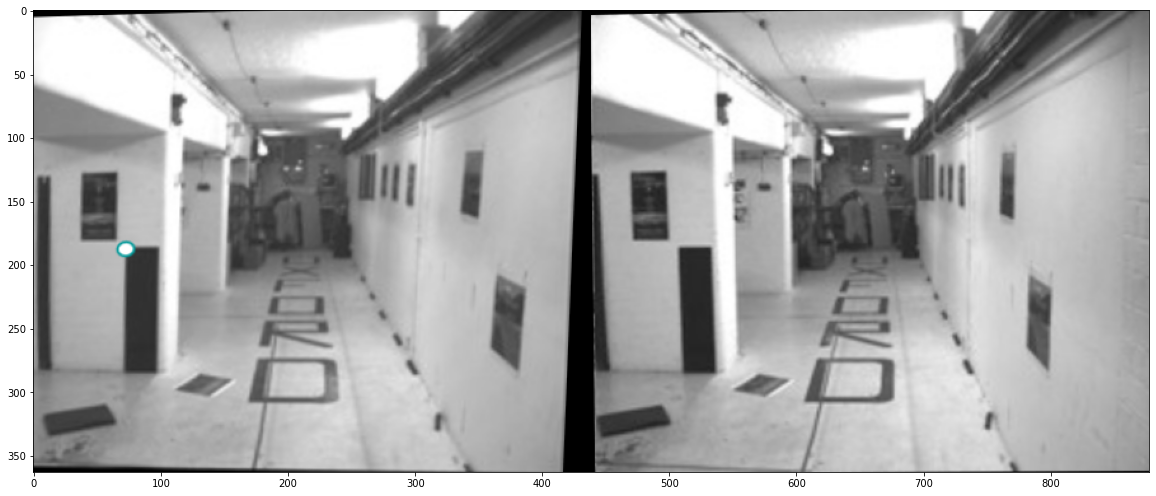

In [10]:
# TAREAFA 3
total = np.concatenate((rectified_l, rectified_r), axis=1)

_,offset = rectified_r.shape[:2]
size = 1
cont = 0

# para cada punto clave ...
for p in pts_l:
    # aplicamos a homografia esquerda
    hom_p = np.vstack([p[0],p[1],1])  # punto homoxeneo
    tran_hom_p = H_l @ hom_p
    
    x = np.int32(tran_hom_p[0]/hom_p[2])
    y = np.int32(tran_hom_p[1]/hom_p[2])
    
    if y > 0:
        cont+=1
        color = tuple(np.random.randint(0,255,3).tolist())
        cv2.circle(total,(x,y), 2*size, color, -1)
        cv2.line(total, (offset,y), (2*offset,y), color, size)

plt.figure()
plt.imshow(total)
print("Numero de puntos:", cont)

In [11]:
# Visualizamos os valores das homografias
print("H_l = ")
print(H_l)

print("H_r = ")
print(H_r)

H_l = 
[[-5.05812904e-01  2.12048784e-02  6.33796135e+00]
 [ 1.49853557e-02 -5.12307074e-01 -3.11060080e+00]
 [ 6.14341154e-05  8.16049198e-07 -5.26242575e-01]]
H_r = 
[[ 9.90720627e-01  1.09392116e-02 -7.05181613e-01]
 [-2.21438459e-02  9.99816452e-01  4.04804951e+00]
 [-5.09304935e-05 -5.62357773e-07  1.00934101e+00]]


**Comproba se os teus resultados son correctos**:

<font color='blue'>**Saída correcta:**  </font>

    H_l = 
    [[-4.48201778e-01  2.02246376e-02  8.79537497e+00]
     [-1.94501778e-02 -4.36633942e-01  4.44143313e+00]
     [-6.31237657e-05 -2.52599836e-05 -4.15827289e-01]]
    H_r = 
    [[ 1.02945316e+00 -9.58077348e-03 -3.24241377e+00]
     [ 4.48323907e-02  9.99626066e-01 -8.03314514e+00]
     [ 1.62963903e-04 -1.51665010e-06  9.70834163e-01]]

### **<span style="color:green"><b><i>TAREFA 4: Cálculo das liñas epipolares</i></b></span>**


Tendo a matriz Fundamental, **tamén podemos calcular as liñas epipolares** que corresponden a calquera punto, **aínda que as imaxes non estean rectificadas**. Lembra que a matriz Fundamental engloba a información xeométrica intrínseca entre dúas vistas, independentemente da escena!. O método de OpenCV [cv2.computeCorrespondEpilines](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga19e3401c94c44b47c229be6e51d158b7) facilita isto, tendo como entradas:

- `points`: conxunto de $N$ puntos de entrada dos cales se calcularán as liñas epipolares correspondentes
- `whichImage`: índice da imaxe (1 para a esquerda ou 2 para a dereita) que contén os puntos
- `F`: a matriz fundamental

Devolve os **coeficientes das liñas epipolares** nunha matriz ($N \times 1 \times 3$).

Para mostrar as liñas epipolares, proporcionámosche un método chamado `drawlines` (na segunda cela de código deste caderno) que representa as epilíneas nunha imaxe e os seus correspondentes puntos clave (coa mesma cor) na outra imaxe, as súas entradas son:

- `im_points`: imaxe de entrada na que se van debuxar os puntos
- `pts`: matriz que contén as coordenadas dos puntos ($N \times 2$) de `im_points`
- `im_lines`: imaxe de entrada na que se van debuxar as liñas epipolares
- `lines`: coeficientes das liñas epipolares trazadas en `im_lines`
- `size`: tamaño dos elementos debuxados (por defecto 5). Cambia isto se non podes ver as liñas e os puntos ou son demasiado grandes.

Devolve dúas imaxes, `im_lines` (coas liñas superpostas) e `im_points` (onde os puntos foron debuxados).

**Que facer?** Calcula as **liñas epipolares dos puntos clave detectados previamente na imaxe dereita**. Despois, **debuxa as liñas epipolares na imaxe da esquerda** e os puntos na dereita.

Finalmente, visualiza as dúas imaxes.

**Deberías conseguir algo como:**
    
<center>
    <img src="./images/expected_output_assignment4.png" />
</center>

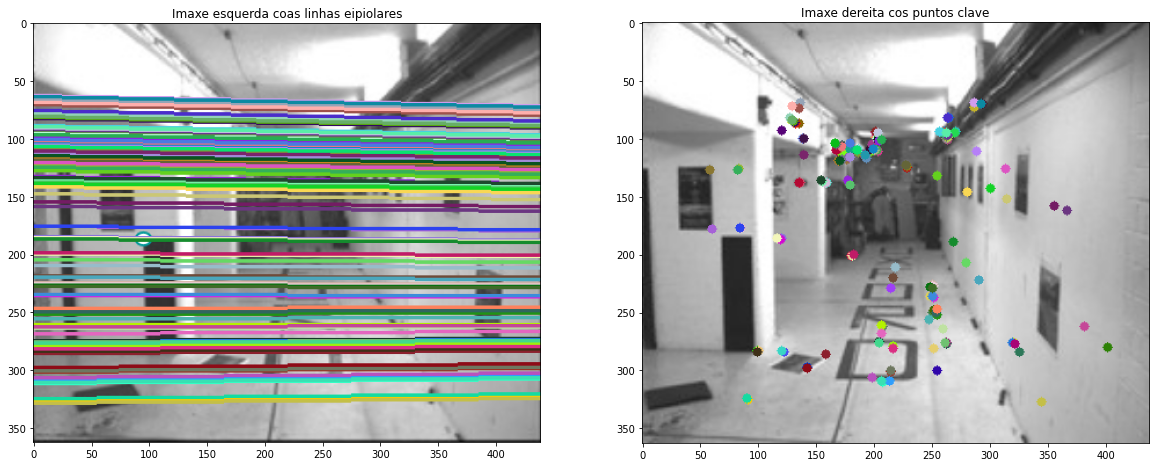

In [12]:
# TAREFA 4

# Busca epilinas correspondentes aos puntos da imaxe da dereita
lines_l = cv2.computeCorrespondEpilines(pts_r.reshape(-1,1,2), 2, F)
lines_l = lines_l.reshape(-1,3)

# Debuxa liñas epipolares
epipolar_l, epipolar_r = drawlines(im_r,pts_l,im_l,lines_l,2)

# Visualiza as imaxes
plt.subplot(121)
plt.title('Imaxe esquerda coas linhas eipiolares')
plt.imshow(epipolar_l)

plt.subplot(122)
plt.title('Imaxe dereita cos puntos clave')
plt.imshow(epipolar_r);

## Conclusión

Ten en conta que se tivésemos un sistema estéreo fixo, **a matriz Fundamental será constante para calquera par de imaxes**. De todos os xeitos, unha vez aplicada a rectificación, a triangulación é máis precisa, e tamén o sería o cálculo da profundidade.

Neste caderno aprendemos:

- Fundamentos da xeometría epipolar
- como realizar a rectificación estéreo para cámaras non calibradas e calibradas
- como atopar a matriz Fundamental a partir dun par de imaxes